### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

Dependent Variable: Time

Independent Variable: Congruent and Incongruent

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

H0: μi - μc ≤ 0 (μi - population mean of incongruent values, μc - population mean of congruent values)

H1: μi - μc > 0

Null Hypothsis - H0: There is no change or equal change in time between the congurent and incongurent reading tasks

Alternate Hypothesis - H1: The incongruent reading task takes more time when compared with the congurent

- We'll be using two tailed t-test

We are comparing 2 dependent samples of data and finding out if the difference between them is significant significant.

Standard deviations for sample is unknown and the size of the sample is less than 30.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [63]:
# Perform the analysis here
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
%matplotlib inline

stroop_df = pd.read_csv('stroopdata.csv') #Reads the data and stores it as stroop_df

stroop_df.head() #Displays the first 5 data observations

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [29]:
stroop_df.describe() #Gives summary of the descriptive statistics for the data set provided

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


Mean: Congruent; 14.051 Incongruent: 22.016

Standard Deviation: Congruent; 3.56 Incongruent: 4.80

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

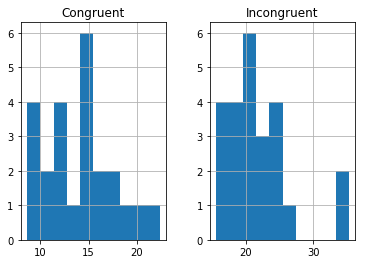

In [30]:
stroop_df.hist(); #Plots a histogram for all columns in the data set

**For both plots it was observed that they are right skewed. The plot for incogruent shows that the data provided might have an outlier present**

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [54]:
stroop_sample = stroop_df.sample(24) #Return a random sample of items from an axis of object.

In [55]:
mean_incon = stroop_sample['Incongruent'].mean() #Reads all data in the 'incongruent' column and finds the mean value
mean_con = stroop_sample['Congruent'].mean() #Reads all data in the 'congruent' column and finds the mean value

mean_incon - mean_con #Difference in means

7.9647916666666703

In [56]:
diffs = [] #stores the simulation as p_diffs

for _ in range(10000):  #Smimulates 10,000 test of the differences in means calculated above
    bootsample = stroop_sample.sample(24, replace = True)
    mean_incon = bootsample['Incongruent'].mean()
    mean_con = bootsample['Congruent'].mean()
    diffs.append(mean_incon - mean_con)

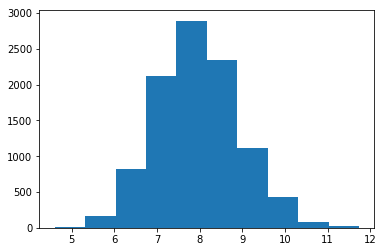

In [57]:
plt.hist(diffs); #Plots a histogram for all values in 'diffs'

In [58]:
np.percentile(diffs,0.5), np.percentile(diffs,99.5)

(5.6709043750000019, 10.612363124999996)

In [69]:
t.ppf(.95, 23) #t-critical value with a 95% confidence and 23 degrees of freedom

1.7138715277470473

In [70]:
stroop_df['Difference'] = stroop_df['Congruent'] - stroop_df['Incongruent']
stroop_df['Difference'].std() #Standard deviation for congruent

4.8648269103590556

In [71]:
7.96/(4.8648 / math.sqrt(24)) #returns the t-value

8.015925979507523

If the t-value is greater that the critical value, we reject the null but if not we fail to reject the null. In this case, the t-value is ***8.0159*** and the critical value is ***1.7139*** so we reject the null hypothesis. This resonates with my expectations as the time to do congrent tasks takes less time than that of incongruent task. I myself tested it.

**Resources**
https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/t-score-vs-z-score/
https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f
https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/regression-models/using-the-t-value-to-determine-whether-to-reject-the-null-hypothesis/
http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-24.html

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--write answer here--